# Problem Set 3
In this problem set you will get some practice with gradient descent and sub-gradient descent. There is a template for setting up your code and plotting your results at the end of this notebook, which you may find useful. Note that it is only a suggestion -- you are not required to use it.

## Problem 1: Gradient Descent
Consider three quadratics, as given by:
$$
f_i(x) = \frac{1}{2} x^{\top}Q_ix + q_i^{\top} x + c_i,
$$
for the three triples $(Q_i,q_i,c_i)$, $i=1,2,3$ given below.

In [7]:
import numpy as np
Q1 = np.array([[ 1.17091573, -0.03686123, -0.1001259 ],
       [-0.03686123,  1.03835691,  0.17285956],
       [-0.1001259 ,  0.17285956,  1.06072736]])
Q2 = np.array([[ 15.27095759,  -1.97915834, -14.22190153],
       [ -1.97915834,   0.34660759,   1.91586927],
       [-14.22190153,   1.91586927,  15.76943482]])
Q3 = np.array([[28.59657006,  0.3684004 ,  0.90750259],
       [ 0.3684004 , 28.11480924,  0.81866989],
       [ 0.90750259,  0.81866989, 28.7886207 ]])
q1 = np.array([-4.68686663, -0.89027884, -1.57340281])
q2 = np.array([ 6.75973216,  1.23223936, -0.87956749])
q3 = np.array([ 0.8684369 , -4.69970837, -1.09690726])
c1 = 1.61888566;
c2 = -2.66426693;
c3 = 0.84184738;

### Part (A)
Implement gradient descent with a step-size of $0.1$ for all three quadratics, and plot function value versus iteration number. Explain what you see.

#### Gradient Descent Algorithm

$$
\nabla f_i(x) = Q_ix + q_i^{\top}
$$

In [14]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time

# ∇𝑓𝑖(𝑥)=𝑄𝑖𝑥+𝑞⊤𝑖

def gradient(x, Q, q):
    return np.dot(Q, x) + q
    # return Q @ x + q

def hessian(x, Q, q):
    return Q
    
# def gradient_descent_step()
    
def gradient_descent(x_0, learning_rate, precision, Q_1, q_1, c_1):
    iteration_count = 0
    prev_x = np.zeros((3,1))
    current_change = float('inf')
    x = x_0

    value_by_iteration = [x]

    while current_change > precision:
        # calculate gradient
        grad = gradient(x, Q_1, q_1)
        # test if gradient is in the valid range
        if np.isposinf(abs(grad.flat[np.abs(grad).argmax()])):
            break
        
        # descend
        prev_x = x
        x = x - learning_rate * grad
        # set variables
        iteration_count += 1
        move = prev_x - x
        current_change = abs(move.flat[np.abs(move).argmax()])
        value_by_iteration += [x]
        
        # print(f'value of x: {x}, at iteration: {iteration_count}, change: {current_change}')
        # print(f'value of grad: {grad}, at iteration: {iteration_count}, change: {current_change}')
    return value_by_iteration

In [9]:
def compute_function(x, Q, q, c):
    return (np.transpose(x) @ Q @ x + np.transpose(q) @ x + c) / 2

def compute_function_for_all_iterations(val_by_iteration, Q, q, c):
    return [compute_function(x, Q, q, c) for x in val_by_iteration]

#### Solution Part (A)

/var/folders/0b/pw2sstfn48185tq9mm274nmm0000gr/T/ipykernel_58404/4175059009.py:2: RuntimeWarning: overflow encountered in matmul
  return (np.transpose(x) @ Q @ x + np.transpose(q) @ x + c) / 2


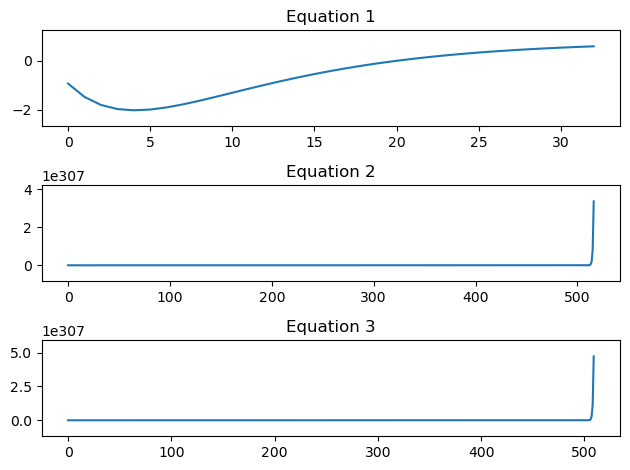

In [10]:
# x_0 = np.zeros(Q1.shape[1])
x_0 = np.random.random(Q1.shape[1])
# print(x_0)
learning_rate = 0.1
precision = 0.01
g_d_eq1 = gradient_descent(x_0, learning_rate, precision, Q1, q1, c1)
g_d_eq2 = gradient_descent(x_0, learning_rate, precision, Q2, q2, c2)
g_d_eq3 = gradient_descent(x_0, learning_rate, precision, Q3, q3, c3)

f1 = compute_function_for_all_iterations(g_d_eq1, Q1, q1, c1)
f2 = compute_function_for_all_iterations(g_d_eq2, Q2, q2, c2)
f3 = compute_function_for_all_iterations(g_d_eq3, Q3, q3, c3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

ax1.margins(x=0.05, y=0.25)
ax1.plot(range(0, len(f1)), f1)
ax1.set_title("Equation 1")

ax2.margins(x=0.05, y=0.25)
ax2.plot(range(0, len(f2)), f2)
ax2.set_title("Equation 2")

ax3.margins(x=0.05, y=0.25)
ax3.plot(range(0, len(f3)), f3)
ax3.set_title("Equation 3")

fig.tight_layout()

plt.show()

#### Explanation Part (A)



### Part (B)
Find a step-size for each quadratic (it can be different for each), and implement gradient descent with this stepsize. Plot function value versus iteration number. Try to pick a step size that gives you fast convergence. How did you pick it?

In [ ]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

Our assumption is the $\nabla f$ is Lipschitz continuous with constant L. That Lipschitz constant $L$ can be estimated by inequality $\nabla^2 f \le LI$.

Once we have Lipschitz constant the fix learning rate can be set to $\eta \leq 1/L$

credit - https://www.stat.cmu.edu/~ryantibs/convexopt-F13/scribes/lec6.pdf

0.5229298798653527
0.0333019412732491
0.020243371223103077


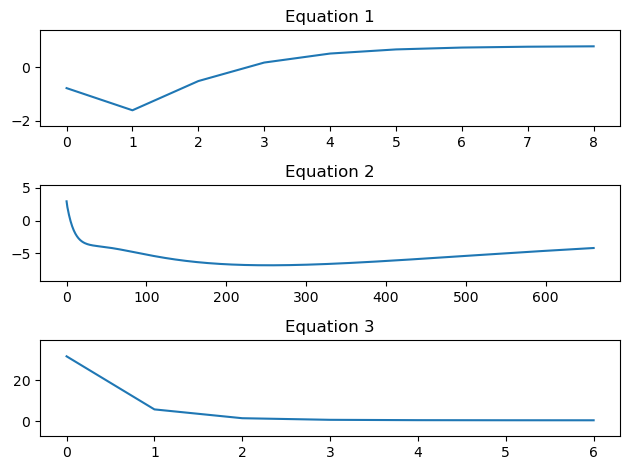

In [43]:

# x_0 = np.zeros(Q1.shape[1])
x_0 = np.random.random(Q1.shape[1])
# print(x_0)
L1 = np.linalg.norm(hessian(x_0, Q1, q1))
learning_rate_1 = 1/ L1
print(f'Learning rate for first quadratic {learning_rate_1}')

L2 = np.linalg.norm(hessian(x_0, Q2, q2))
learning_rate_2 = 1 / L2
print(f'Learning rate for second quadratic {learning_rate_2}')

L3 = np.linalg.norm(hessian(x_0, Q3, q3))
learning_rate_3 = 1 / L3
print(f'Learning rate for third quadratic {learning_rate_3}')


precision = 0.01
g_d_eq1 = gradient_descent(x_0, learning_rate_1, precision, Q1, q1, c1)
g_d_eq2 = gradient_descent(x_0, learning_rate_2, precision, Q2, q2, c2)
g_d_eq3 = gradient_descent(x_0, learning_rate_3, precision, Q3, q3, c3)

f1 = compute_function_for_all_iterations(g_d_eq1, Q1, q1, c1)
f2 = compute_function_for_all_iterations(g_d_eq2, Q2, q2, c2)
f3 = compute_function_for_all_iterations(g_d_eq3, Q3, q3, c3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

ax1.margins(x=0.05, y=0.25)
ax1.plot(range(0, len(f1)), f1)
ax1.set_title("Equation 1")

ax2.margins(x=0.05, y=0.25)
ax2.plot(range(0, len(f2)), f2)
ax2.set_title("Equation 2")

ax3.margins(x=0.05, y=0.25)
ax3.plot(range(0, len(f3)), f3)
ax3.set_title("Equation 3")

fig.tight_layout()

plt.show()

### Part (C)
Even with your carefully tuned choice of step size, you will see that the rates of convergence are not the same, Explain why this is the case.

### Part (D) -- Optional -- 
Read about back tracking line search (BTLS) and implement it here. 

1. First set a parameter $\beta \in [0, 1]$
2. Set a parameter $\alpha \in [0, 0.5]$
2. Then at each iteration, start with $t = 1$, and while \
$f(x - t\nabla f(x)) > f(x) - \alpha t . \nabla f(x)^T 
\frac{t}{2}||\nabla f(x)||^2$ \
update $t = \beta t$

https://sites.math.washington.edu/~burke/crs/516/notes/backtracking.pdf

In [46]:
def backtrace(x_0, Q, q, c):
    # Initialize
    alpha = 0.3
    beta = 0.8
    t = 1
    x = x_0

    # Iteration
    while compute_function((x - t * gradient(x, Q, q)), Q, q, c) > (compute_function(x, Q, q, c) - (alpha *(np.linalg.norm(gradient(x, Q, q)) ** 2) * t / 2)):
        t *= beta

    return t

bt_learning_rate_1 = backtrace(np.zeros(Q1.shape[1]), Q1, q1, c1)
bt_learning_rate_2 = backtrace(np.zeros(Q2.shape[1]), Q2, q2, c2)
bt_learning_rate_3 = backtrace(np.zeros(Q3.shape[1]), Q3, q3, c3)

print(f'BTLS learning rate for first quadratic: {bt_learning_rate_1}')
print(f'BTLS learning rate for second quadratic: {bt_learning_rate_2}')
print(f'BTLS learning rate for third quadratic: {bt_learning_rate_3}')

BTLS learning rate for first quadratic: 0.5120000000000001
BTLS learning rate for second quadratic: 0.03518437208883203
BTLS learning rate for third quadratic: 0.022517998136852502


## Problem 2: Sub-gradient Method
Consider a least squares problem with $\ell^1$ regularization:
$$
\min_x \left[f(x) = \frac{1}{2}\|{Ax-b}\|_2^2 + \lambda \|{x}\|_1 \right]
$$

This problem is often called LASSO (least absolute shrinkage and selection operator) and is known to induce {\em sparse} solutions with few nonzero elements in $x$, which can have advantages in terms of computation and interpretability. This problem is nonsmooth due to the regularization term. It is also not strongly convex when $A$ has more columns than rows. We (i.e., you) will solve this problem using several different algorithms in this class. We start with what we have seen thus far: the subgradient method. 

The dataset represented in the matrices provided in the numpy binary files A.npy and b.npy are from a diabetes dataset (scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) with 10 features that has been corrupted with an additional 90 noisy features. Thus a sparse solution should be very effective. Below you will find some skeleton code to help with loading the data, running the algorithm and plotting the results. Don't use stock optimization code, you should develop the core part of this assignment yourself.

Minimize $f(x)$ using $10^4$ iterations of the subgradient method starting with $t=0$ and $x_0 =0$. 

### Part (A)
Use a decreasing step size of $\eta_t = c/t$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (B) 
Now use a more slowly decreasing step size of $\eta_t = c/\sqrt{t+1}$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (C)
Now try to find the best fixed step size. Plot the results and compare to the decreasing step size you see above. 

### Part (D) -- Optional --
If you did the BTLS optional part above, either implement BTLS for subgradient method, or explain why the challenges are with this. 


Here is a template that may be useful. Note that it is designed for the LASSO problem, so you will have to modify it to use it for the quadratic problems at the beginning, but the ideas are the same.

In [12]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time


def subgradient(x, A, b, t, lam, c=1e-5):
    # update x (your code here), set c above
    return x

def descent(update, A, b, reg, T=int(1e4)):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    for t in range(T):
        # update A (here subgradient, but you can re-use when we develop other algorithms)
        x = update(x, A, b, t, reg)
        
        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))

            assert not np.isnan(error[-1])

    return x, error, l1


def main(T=int(1e3)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    x_sg, error_sg, l1_sg = descent(subgradient, A, b, reg=0., T=T)

    plt.clf()
    plt.plot(error_sg, label='Subgradient')
    plt.title('Error')
    plt.legend()
    plt.savefig('error.eps')

    plt.clf()
    plt.plot(l1_sg, label='Subgradient')
    plt.title("$\ell^1$ Norm")
    plt.legend()
    plt.savefig('l1.eps')


if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'A.npy'